In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import cv2
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from torch import optim
%matplotlib inline

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import Image
import cv2
import os
from torchvision import transforms
import torch
import pickle
from random import shuffle
import helper

### Get the pickled list

In [65]:
import pickle
with open('final_list', 'rb') as f:
    mynewlist = pickle.load(f)

In [66]:
type(mynewlist[0][0])

numpy.ndarray

In [67]:
mynewlist[0][0].dtype

dtype('uint8')

#### Convert to tensors

In [68]:
transform = transforms.ToTensor()

In [118]:
tensors = []
for num in mynewlist:
    tensors.append((transform(num[0]).view(1,28,28).type(torch.FloatTensor), num[1]))

In [119]:
type(tensors[0][0])

torch.Tensor

In [120]:
train_loader = torch.utils.data.DataLoader(tensors, batch_size=5, shuffle=True)

In [121]:
batch = next(iter(train_loader))
print('len:', len(batch))

len: 2


In [122]:
images, labels = batch
print('Types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

Types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([5, 1, 28, 28]) torch.Size([5])


In [123]:
labels

tensor([7, 9, 9, 1, 9])

# Define the model for CLassification

In [131]:
class ConvolutionalNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3, 1)
        self.conv2 = nn.Conv2d(6, 16, 3, 1)
        self.fc1 = nn.Linear(5*5*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,10)

    def forward(self, X):
        X = F.relu(self.conv1(X))
        X = F.max_pool2d(X, 2, 2)
        X = F.relu(self.conv2(X))
        X = F.max_pool2d(X, 2, 2)
        X = X.view(-1, 5*5*16)
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [132]:
torch.manual_seed(42)
network = ConvolutionalNetwork()
network

ConvolutionalNetwork(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [139]:
train_loader = torch.utils.data.DataLoader(tensors, batch_size=10)
optimizer = optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0
# training with multiple epochs:

for epoch in range(25):
    total_loss = 0
    total_correct = 0

    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch:", 0,
        "total_correct:", total_correct,
        "loss:", total_loss
    )

epoch: 0 total_correct: 4027 loss: 47.54142668609893
epoch: 0 total_correct: 3999 loss: 56.1076728791586
epoch: 0 total_correct: 4074 loss: 20.10596287587032
epoch: 0 total_correct: 4079 loss: 17.907977140192315
epoch: 0 total_correct: 3951 loss: 73.32604054088824
epoch: 0 total_correct: 4070 loss: 18.5201479631678
epoch: 0 total_correct: 4073 loss: 16.661148344160665
epoch: 0 total_correct: 3987 loss: 53.49281477291231
epoch: 0 total_correct: 4072 loss: 21.149168646398657
epoch: 0 total_correct: 4063 loss: 17.798377055621643
epoch: 0 total_correct: 4072 loss: 16.784970149383298
epoch: 0 total_correct: 4070 loss: 16.28126316080242
epoch: 0 total_correct: 4075 loss: 15.599162315689007
epoch: 0 total_correct: 4074 loss: 15.464175360730362
epoch: 0 total_correct: 4073 loss: 15.343488828449907
epoch: 0 total_correct: 4077 loss: 15.316256768383017
epoch: 0 total_correct: 4070 loss: 15.331226338356238
epoch: 0 total_correct: 3835 loss: 123.29128232013866
epoch: 0 total_correct: 4067 loss: 19

In [75]:
total_loss += loss.item()
total_correct += get_num_correc(preds, labels)

Types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([5, 1, 28, 28]) torch.Size([5])


In [77]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [78]:
@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

# Let's try to predict using the model

In [ ]:
# Import a new image

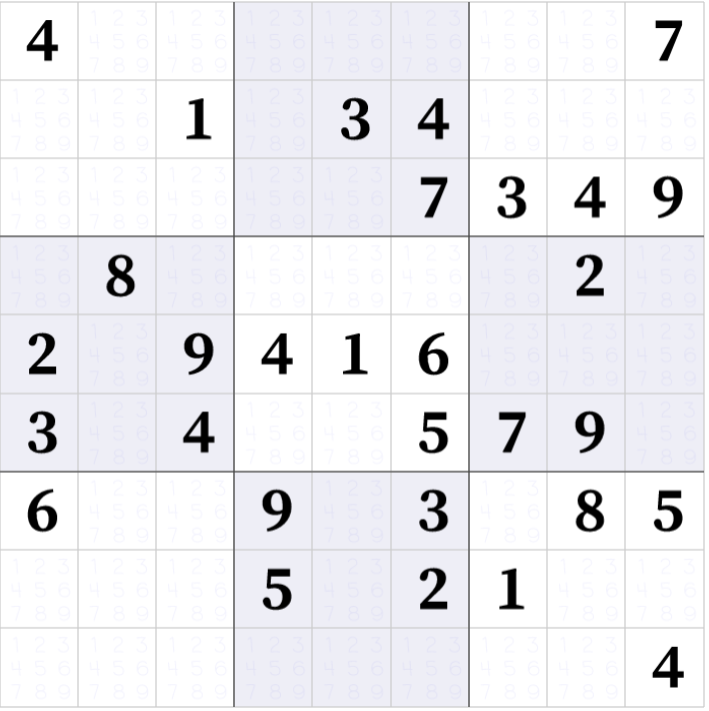

In [223]:
(Image(filename='pred_img.png'))

In [224]:
filename = 'pred_img.png'
img = cv2.imread(filename)

In [225]:
cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

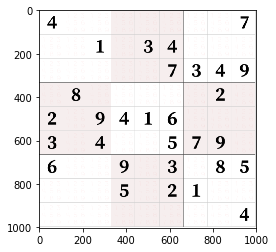

In [226]:
W = 1000
heigh, width, depth = img.shape
imgScale = W/width
newX, newY = img.shape[1]*imgScale, img.shape[0]*imgScale
new_img = cv2.resize(img, (int(newX), int(newY)))
cv2.imshow("Show by CV2", new_img)
cv2.waitKey(0)
cv2.imwrite('resize_white_img.png', new_img)
plt.imshow(new_img) 


In [227]:
invert_img = cv2.bitwise_not(new_img)
cv2.imshow("invert1", invert_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [228]:
rows = [(15,125), (125,225), (235,335), (340,440), (455,555), (570,670), (680,780), (775,875), (890,990)]
columns = [(30,130), (130,230), (240,340), (355,455), (455,555), (565,665), (670,770), (800,900),(890,990)]
images_list = []
for unit in rows:
    for units in columns:
        images_list.append(invert_img[unit[0]:unit[1], units[0]:units[1]])

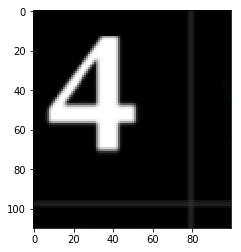

In [229]:
plt.imshow(images_list[0])

In [230]:
final_images = []
for i in range(len(images_list)):
#    img_array = cv2.imread(os.path.join(IMG_DIR, images))
    img_array = cv2.cvtColor(images_list[i], cv2.COLOR_BGR2GRAY)
    resize_img = cv2.resize(img_array, (28,28))
    final_images.append(resize_img)

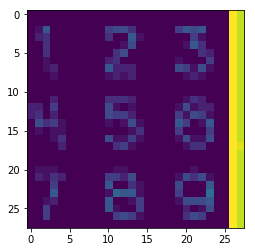

In [231]:
plt.imshow(final_images[77]) # 47, 57, 69, 

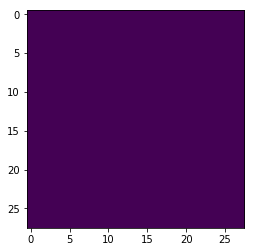

In [239]:
plt.imshow(np.full_like(final_images[2], 0))

In [258]:
final_images[2].shape

(28, 28)

In [257]:
(final_images[7].max())

29

In [247]:
for i in range(len(final_images)):
    if final_images[i].max() != 255:
        np.full_like(final_images[i], 0)

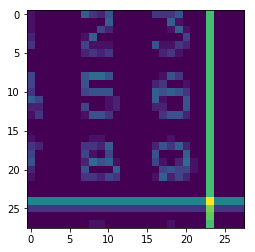

In [249]:
plt.imshow(final_images[3])

In [240]:
for i in range(len(final_images)):
    if final_images[i].max() != 255:
        np.full_like(final_images[i], 0);

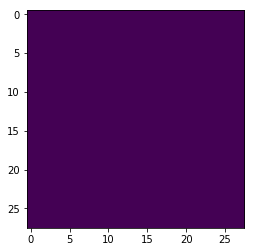

In [246]:
plt.imshow(np.full_like(final_images[3], 0))

filenames = os.listdir(IMG_DIR)
#filenames.sort()
final_images = []
for images in filenames:
    img_array = cv2.imread(os.path.join(IMG_DIR, images))
    img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
    resize_img = cv2.resize(img_array, (28,28))
    final_images.append(resize_img)

In [153]:
type(final_images[20])

numpy.ndarray

In [154]:
final_images[20].shape

(28, 28)

In [185]:
transform = transforms.ToTensor()
tensor_images = []
for images in final_images:
    tensors = torch.tensor(images, dtype=torch.float)
    tensor_images.append(tensors)

In [186]:
type(tensor_images[2]), tensor_images[0].mean()

(torch.Tensor, tensor(26.3941))

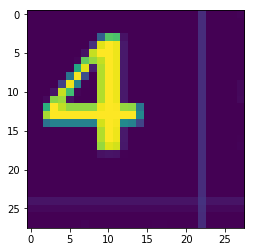

In [97]:
plt.imshow(final_images[0])

In [113]:
model(tensor_images[23].view(1,1,28,28)).argmax().item()

6

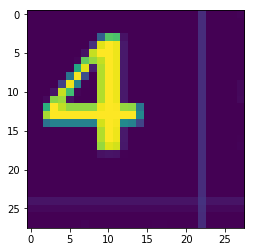

In [250]:
plt.imshow(final_images[0])

In [167]:
# train_loader = torch.utils.data.DataLoader(tensor_images, batch_size=10, shuffle=True)

In [168]:
# batch = next(iter(train_loader))
# print('len:', len(batch))

len: 10


In [169]:
images = batch

In [170]:
# print('Types:', type(images))
# print('shapes:', images.shape)

Types: <class 'torch.Tensor'>
shapes: torch.Size([10, 28, 28])


In [171]:
images.shape

torch.Size([10, 28, 28])

In [259]:
for i in range(len(final_images)):
    print(final_images[i].mean())

26.394132653061224
2.061224489795918
5.776785714285714
17.510204081632654
17.43622448979592
18.568877551020407
1.3329081632653061
2.038265306122449
19.5
2.7589285714285716
2.524234693877551
26.4515306122449
17.85841836734694
42.58163265306123
43.432397959183675
1.8035714285714286
2.4693877551020407
1.8125
5.823979591836735
5.579081632653061
9.229591836734693
20.681122448979593
20.600765306122447
40.98979591836735
31.43622448979592
31.918367346938776
32.77423469387755
17.355867346938776
46.73852040816327
18.205357142857142
1.441326530612245
1.2755102040816326
3.316326530612245
16.744897959183675
42.15688775510204
16.742346938775512
43.00127551020408
17.572704081632654
44.9655612244898
28.160714285714285
23.006377551020407
33.3125
17.0765306122449
17.51658163265306
17.0625
45.76913265306123
20.471938775510203
45.94005102040816
6.394132653061225
6.219387755102041
35.74234693877551
39.46938775510204
46.96938775510204
20.003826530612244
32.10331632653061
2.5408163265306123
6.252551020408164

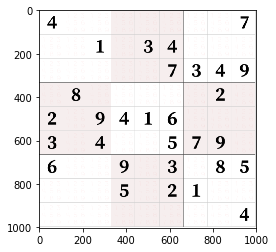

In [260]:
plt.imshow(new_img)

In [261]:
def convert(tensor): # always be passing in an array
    grid = []
    for i in range(len(tensor)):
        if tensor[i].mean().item() <= 23:
            grid.append(".")
        else:
            grid.append(str(network(tensor[i].view(1,1,28,28)).argmax().item()))
    return grid

In [262]:
convert(tensor_images)

['9',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '9',
 '.',
 '8',
 '8',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '8',
 '8',
 '9',
 '8',
 '.',
 '8',
 '.',
 '.',
 '.',
 '.',
 '.',
 '9',
 '.',
 '9',
 '.',
 '8',
 '9',
 '6',
 '8',
 '.',
 '.',
 '.',
 '9',
 '.',
 '8',
 '.',
 '.',
 '8',
 '6',
 '9',
 '.',
 '9',
 '.',
 '.',
 '9',
 '.',
 '8',
 '.',
 '9',
 '8',
 '.',
 '.',
 '.',
 '8',
 '.',
 '8',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '.',
 '8']

# Model